# Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 와인 데이터
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                          1.36  3.23    2.36  0.27\

In [4]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [5]:
data = pd.DataFrame(data, columns= columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. k-Means

### Data Preprocessing

In [6]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data = scaler.fit_transform(data)

In [7]:
data.shape

(178, 13)

## 2. PCA (차원의 축소)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)

data = pca.fit_transform(data)

In [9]:
data[:5]

array([[-0.70633576, -0.25319275],
       [-0.4849768 , -0.00882289],
       [-0.52117227, -0.18918722],
       [-0.82164366, -0.58090551],
       [-0.20254638, -0.05946657]])

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 3)

In [11]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [12]:
cluster = kmeans.predict(data)

In [13]:
type(cluster)

numpy.ndarray

In [14]:
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

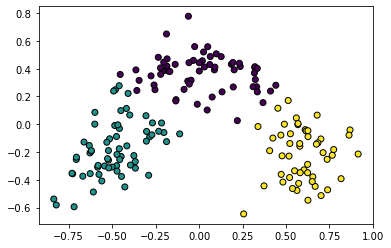

In [15]:
plt.scatter(data[:,0], data[:,1], c= cluster, edgecolors='black', linewidths=1)

## 3. Hierarchical Clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering
single_clusgtering   = AgglomerativeClustering(n_clusters=3, linkage='single')
complete_clusgtering = AgglomerativeClustering(n_clusters=3, linkage='complete')
average_clusgtering  = AgglomerativeClustering(n_clusters=3, linkage='average')

In [17]:
single_clusgtering.fit(data)
complete_clusgtering.fit(data)
average_clusgtering.fit(data)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [20]:
single_cluster    = single_clusgtering.labels_
complete_clusgter = complete_clusgtering.labels_
average_clusgter  = average_clusgtering.labels_

In [23]:
print(single_cluster)
print(complete_clusgter)
print(average_clusgter)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 

#### Single Cluster

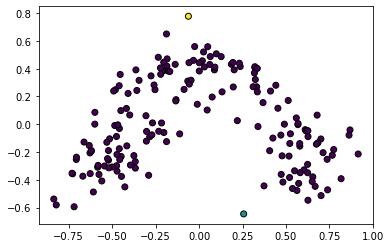

In [24]:
plt.scatter(data[:,0], data[:,1], c= single_cluster, edgecolors='black', linewidths=1)

#### Complete Cluster

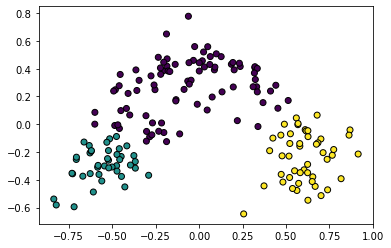

In [26]:
plt.scatter(data[:,0], data[:,1], c= complete_clusgter, edgecolors='black', linewidths=1)

#### Average Cluster

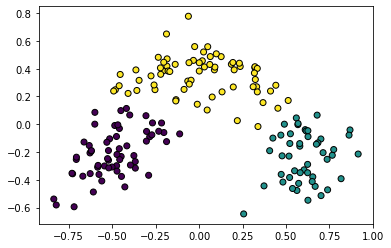

In [27]:
plt.scatter(data[:,0], data[:,1], c= average_clusgter, edgecolors='black', linewidths=1)

In [37]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10,10))
children = single_clusgtering.children_
distance = np.arange(children.shape[0])
no_of_observation = np.arange(2, children.shape[0]+2 )
linkage_matrix = np.column_stack([children, distance, no_of_observation]).astype(float)

<Figure size 720x720 with 0 Axes>

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [32.5, 32.5, 55.0, 55.0],
  [43.75, 43.75, 65.0, 65.0],
  [10.0, 10.0, 54.375, 54.375],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [92.5, 92.5, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [132.5, 132.5, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [143.75, 143.75, 170.0, 170.0],
  [156.875, 156.875, 185.0, 185.0],
  [170.9375, 170.9375, 195.0, 195.0],
  [103.75, 103.75, 182.96875, 182.96875],
  [205.0, 205.0, 215.0, 215.0],
  [143.359375, 143.359375, 210.0, 210.0],
  [176.6796875, 176.6796875, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [200.83984375, 200.83984375, 250.0, 250.0],
  [75.0, 75.0, 225.419921875, 225.419921875],
  [275.0, 275.0, 285.0, 285.0],
  [280.0, 280.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [287.5, 287.5,

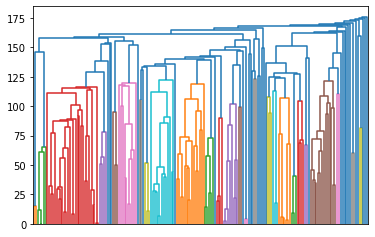

In [40]:
dendrogram(linkage_matrix, p=len(data), labels= single_cluster, show_contracted= True,
          no_labels=True)

### Silhouette

In [46]:
# KMeans
from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1

for n_clusters in range(2,11):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(data)
    cluster = kmeans.predict(data)
    score = silhouette_score(data, cluster)
    
    print('클러스터의 수: {}, 실루엣 점수: {:.2f}'.format(n_clusters, score))
    
    if score > best_score:
        best_score = score
        best_n = n_clusters
        
print('\nBEST 클러스터의 수: {}, 실루엣 점수: {:.2f}'.format(best_n, best_score))

클러스터의 수: 2, 실루엣 점수: 0.49
클러스터의 수: 3, 실루엣 점수: 0.57
클러스터의 수: 4, 실루엣 점수: 0.49
클러스터의 수: 5, 실루엣 점수: 0.46
클러스터의 수: 6, 실루엣 점수: 0.43
클러스터의 수: 7, 실루엣 점수: 0.39
클러스터의 수: 8, 실루엣 점수: 0.38
클러스터의 수: 9, 실루엣 점수: 0.37
클러스터의 수: 10, 실루엣 점수: 0.38

BEST 클러스터의 수: 3, 실루엣 점수: 0.57


In [48]:
# AgglomerativeClustering
best_n = 1
best_score = -1

for n_clusters in range(2,11):
    average_clustering = AgglomerativeClustering(n_clusters = n_clusters, linkage='average')
    average_clustering.fit(data)
    cluster = average_clustering.labels_
    score = silhouette_score(data, cluster)
    
    print('클러스터의 수: {}, 실루엣 점수: {:.2f}'.format(n_clusters, score))
    
    if score > best_score:
        best_score = score
        best_n = n_clusters
        
print('\nBEST 클러스터의 수: {}, 실루엣 점수: {:.2f}'.format(best_n, best_score))

클러스터의 수: 2, 실루엣 점수: 0.49
클러스터의 수: 3, 실루엣 점수: 0.56
클러스터의 수: 4, 실루엣 점수: 0.48
클러스터의 수: 5, 실루엣 점수: 0.42
클러스터의 수: 6, 실루엣 점수: 0.37
클러스터의 수: 7, 실루엣 점수: 0.34
클러스터의 수: 8, 실루엣 점수: 0.34
클러스터의 수: 9, 실루엣 점수: 0.37
클러스터의 수: 10, 실루엣 점수: 0.33

BEST 클러스터의 수: 3, 실루엣 점수: 0.56
